In [1]:
import numpy as np
import ast
from scipy.ndimage.filters import convolve
from scipy.signal import correlate
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Constants

w = 1
b = -1

In [5]:
output = np.array([[1,2,3,4],[4,1,4,1],[2,3,1,3],[4,4,4,4]])
print((output == 4).astype(int))

[[0 0 0 1]
 [1 0 1 0]
 [0 0 0 0]
 [1 1 1 1]]


In [7]:
def visualize_conv(input, filter, padding=False, full_wb_range=True, threshold=False):
    if padding:
        mode = 'same'
    else:
        mode = 'valid'   
    
    output = correlate(input, filter, mode=mode)
    ratio = input.shape[0] / filter.shape[0]
    max_value = np.sum(abs(filter)) * w
    
    if threshold:
        output = (output == max_value).astype(int)
     
    fig, axs = plt.subplots(1, 3, gridspec_kw = dict(width_ratios = [ratio,1,ratio]))
    axs[0].matshow(input, cmap=plt.cm.gray)
    axs[0].set_title('Input')
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    
    
    axs[1].matshow(filter, cmap=plt.cm.gray, vmin=-1, vmax=1)
    axs[1].set_title('Filter')
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    
    if full_wb_range:
        axs[2].matshow(output, cmap=plt.cm.gray)
    else:
        axs[2].matshow(output, cmap=plt.cm.gray, vmin=-max_value, vmax=max_value)
    axs[2].set_title('Output')
    axs[2].set_xticks([])
    axs[2].set_yticks([])
    
    return output


In [22]:
# Basic input patterns

v_stripes = np.array([[b, w, b, w], 
                  [b, w, b, w],
                  [b, w, b, w],
                  [b, w, b, w]])

h_stripes = np.array([[b, b, b, b], 
                  [w, w, w, w],
                  [b, b, b, b],
                  [w, w, w, w]])

checker = np.array([[b, w, b, w],
                    [w, b, w, b],
                    [b, w, b, w],
                    [w, b, w, b]])

def get_rand_input(size=4):
    if type(size) == tuple:
        dims = size
    elif type(size) == int:
        dims = (size, size)
        
    mat = np.zeros(dims)    
            
    return np.random.choice([b,w],dims)


def get_edged_input(size=4):
    if type(size) == tuple:
        dims = size
    elif type(size) == int:
        dims = (size, size)
    
    which_edge = np.random.choice([0,1,2,3],(int(np.ceil(dims[0])/2), int(np.ceil(dims[1])/2)))
    
    first_tile = True
    
    mat = np.zeros(dims)
    
    for i, j in np.ndindex(dims):
        if i % 2 == 0 and j % 2 == 0:
            edge = which_edge[int(i / 2), int(j / 2)]
            if edge == 0:
                # Vertical edge b,w
                mat[i][j] = b
                mat[i][j+1] = w
                mat[i+1][j] = b
                mat[i+1][j+1] = w
            elif edge == 1:
                # Vertical edge w,b
                mat[i][j] = w
                mat[i][j+1] = b
                mat[i+1][j] = w
                mat[i+1][j+1] = b
            elif edge == 2:
                # Horizontal edge w,b
                mat[i][j] = w
                mat[i][j+1] = w
                mat[i+1][j] = b
                mat[i+1][j+1] = b
            else:
                # Horizontal edge w,b
                mat[i][j] = b
                mat[i][j+1] = b
                mat[i+1][j] = w
                mat[i+1][j+1] = w
                
    return mat
        
# 2x2 filters

v_edge_bw_22 = np.array([[-1, 1],
                      [-1, 1]])

h_edge_bw_22 = np.array([[-1, -1],
                      [1, 1]])

v_edge_wb_22 = np.array([[1, -1],
                      [1, -1]])

h_edge_wb_22 = np.array([[1, 1],
                      [-1, -1]])

diag1_22 = np.array([[1, -1],
                    [-1, 1]])

diag2_22 = np.array([[-1, 1],
                    [1, -1]])

corner_black_ul_22 = np.array([[-1, -1],
                              [-1, 1]])

corner_black_ur_22 = np.array([[-1, -1],
                              [1, -1]])

corner_black_ll_22 = np.array([[-1, 1],
                              [-1, -1]])

corner_black_lr_22 = np.array([[1, -1],
                              [-1, -1]])

corner_white_ul_22 = corner_black_ul_22 * -1
corner_white_ur_22 = corner_black_ur_22 * -1
corner_white_ll_22 = corner_black_ll_22 * -1
corner_white_lr_22 = corner_black_lr_22 * -1

# 2x1 filters

bw_21 = np.array([[-1],
                   [1]])

bb_21 = np.array([[-1],
                    [-1]])

wb_21 = np.array([[1],
                [-1]])

ww_21 = np.array([[1],
                [1]])

same_21 = np.array([[-1],
                    [-1]])

# 3x1 filters

www_31 = np.array([[1],
                   [1],
                   [1]])

wwb_31 = np.array([[1],
                   [1],
                   [-1]])

wbw_31 = np.array([[1],
                   [-1],
                   [1]])

bww_31 = np.array([[1],
                   [-1],
                   [1]])

wbb_31 = np.array([[1],
                   [-1],
                   [-1]])

bwb_31 = np.array([[-1],
                   [1],
                   [-1]])

bbw_31 = np.array([[-1],
                   [-1],
                   [1]])

bbb_31 = np.array([[-1],
                   [-1],
                   [-1]])

same_21 = np.array([[-1],
                    [-1]])

# 3x3 filters

v_edge_33 = np.array([[-1, 2, -1],
                      [-1, 2, -1],
                      [-1, 2, -1]])

h_edge_33 = np.array([[-1, -1, -1],
                      [2, 2, 2],
                      [-1, -1, -1]])

identity_33 = np.array([[0, 0, 0],
                        [0, 1, 0],
                        [0, 0, 0]])


def get_rand_filter(dims=(2,2)):
    return np.random.choice([1,-1], dims)

## With padding

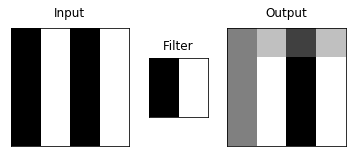

In [36]:
output = visualize_conv(v_stripes, v_edge_22, padding=True, full_wb_range=True)

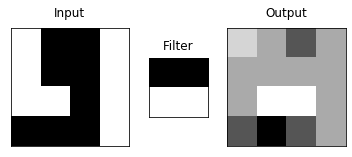

In [17]:
output = visualize_conv(get_edged_input(), h_edge_22, padding=True, full_wb_range=True)

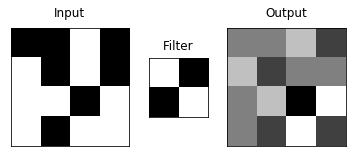

In [38]:
output = visualize_conv(get_rand_input(), diag_22, padding=True, full_wb_range=True)

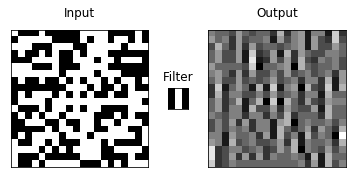

In [39]:
output = visualize_conv(get_rand_input(20), v_edge_33, padding=True, full_wb_range=True)

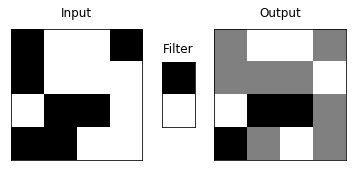

In [48]:
output = visualize_conv(get_rand_input(4), bw_21, padding=True, full_wb_range=True)

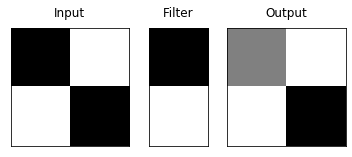

In [55]:
output = visualize_conv(get_rand_input(2), bw_21, padding=True, full_wb_range=True)

## Without padding

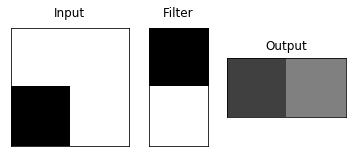

In [42]:
output = visualize_conv(get_rand_input(2), bw_21, padding=False, full_wb_range=False)

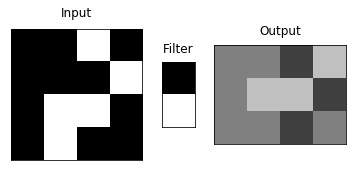

In [43]:
output = visualize_conv(get_rand_input(4), bw_21, padding=False, full_wb_range=False)

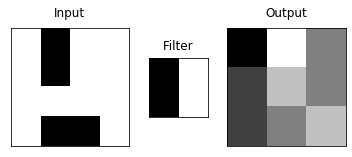

In [57]:
output = visualize_conv_no_pad(get_rand_input(4), v_edge_22, padding=False, full_wb_range=False)

[[-2]
 [ 0]]


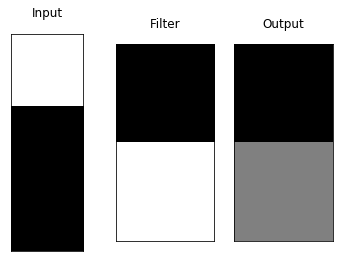

In [51]:
output = visualize_conv(get_rand_input((3,1)), bw_21, padding=False, full_wb_range=False)

print(output)

## 1D Input + Filters

array([[2],
       [0],
       [0]])

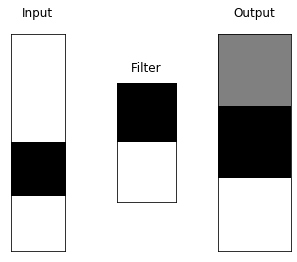

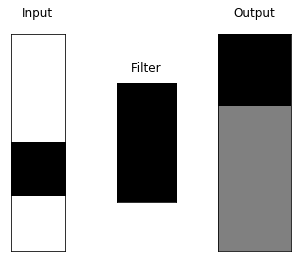

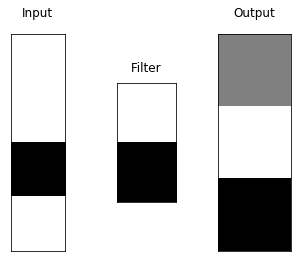

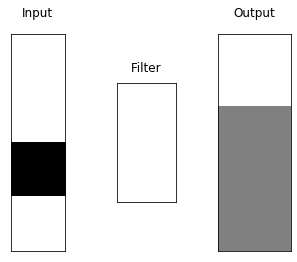

In [89]:
input = get_rand_input((4,1))

visualize_conv(input, bw_21, padding=False, full_wb_range=False)

visualize_conv(input, bb_21, padding=False, full_wb_range=False)

visualize_conv(input, wb_21, padding=False, full_wb_range=False)

visualize_conv(input, ww_21, padding=False, full_wb_range=False)

array([[ 1],
       [ 1],
       [ 1],
       [-1]])

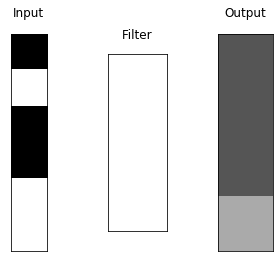

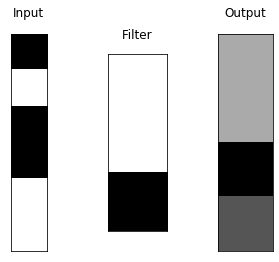

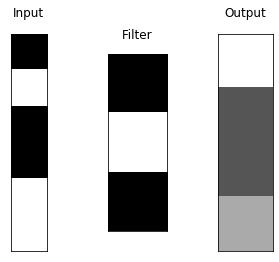

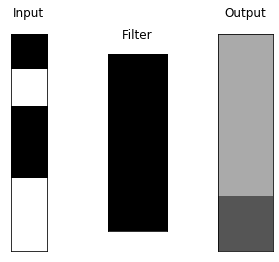

In [99]:
input = get_rand_input((6,1))

visualize_conv(input, www_31, padding=False, full_wb_range=False)

visualize_conv(input, wwb_31, padding=False, full_wb_range=False)

visualize_conv(input, bwb_31, padding=False, full_wb_range=False)

visualize_conv(input, bbb_31, padding=False, full_wb_range=False)

array([[ 1],
       [-1]])

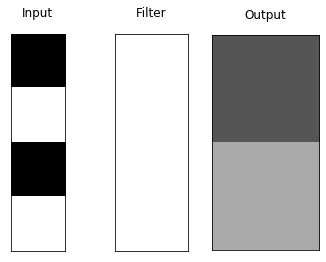

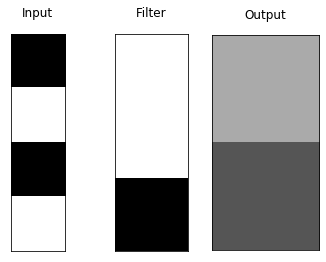

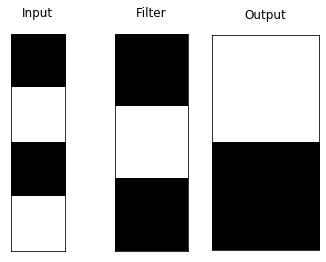

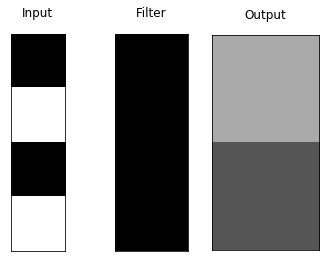

In [100]:
input = get_rand_input((4,1))

visualize_conv(input, www_31, padding=False, full_wb_range=False)

visualize_conv(input, wwb_31, padding=False, full_wb_range=False)

visualize_conv(input, bwb_31, padding=False, full_wb_range=False)

visualize_conv(input, bbb_31, padding=False, full_wb_range=False)

# Edged Input

array([[ 0.,  2.,  4.],
       [ 0.,  0., -2.],
       [ 0.,  0.,  0.]])

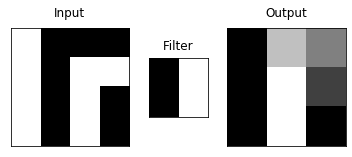

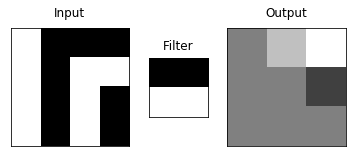

In [19]:
input = get_edged_input(4)

visualize_conv(input, v_edge_22, padding=False, full_wb_range=False)

visualize_conv(input, h_edge_22, padding=False, full_wb_range=False)

array([[-4., -2.,  0.],
       [ 2.,  4.,  0.],
       [ 0.,  0.,  0.]])

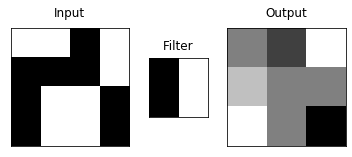

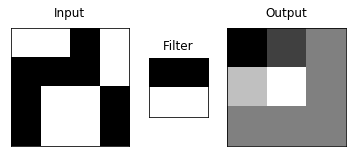

In [20]:
input = get_edged_input(4)

visualize_conv(input, v_edge_22, padding=False, full_wb_range=False)

visualize_conv(input, h_edge_22, padding=False, full_wb_range=False)

[[ 0.  2.  0.]
 [ 2.  0. -4.]
 [ 0.  0.  0.]]
[[ 0. -2.  0.]
 [-2.  0.  4.]
 [ 0.  0.  0.]]


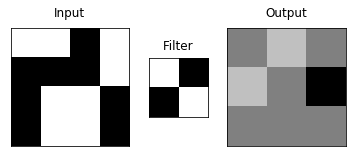

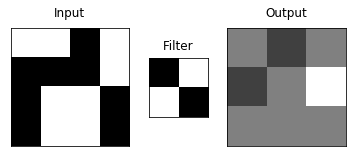

In [25]:
print(visualize_conv(input, diag1_22, padding=False, full_wb_range=False))

print(visualize_conv(input, diag2_22, padding=False, full_wb_range=False))   

[[ 0.  0.  0.]
 [ 4. -2.  2.]
 [ 0. -2.  0.]]
[[ 0.  0.  0.]
 [-4.  2. -2.]
 [ 0.  2.  0.]]


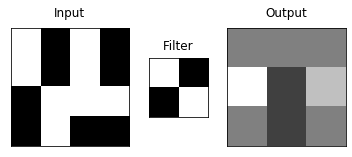

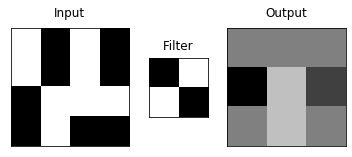

In [34]:
input = get_edged_input(4)

print(visualize_conv(input, diag1_22, padding=False, full_wb_range=False))

print(visualize_conv(input, diag2_22, padding=False, full_wb_range=False))   

array([[ 0.,  0.,  0.],
       [-2.,  0.,  2.],
       [ 4.,  0., -4.]])

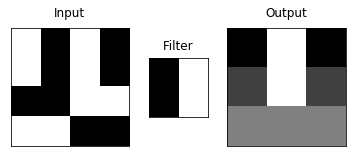

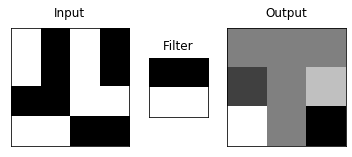

In [33]:
input = get_edged_input(4)

visualize_conv(input, v_edge_22, padding=False, full_wb_range=False)

visualize_conv(input, h_edge_22, padding=False, full_wb_range=False)

## With Threshold

array([[0, 0, 1],
       [0, 0, 0],
       [0, 0, 0]])

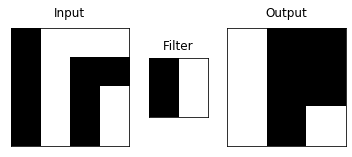

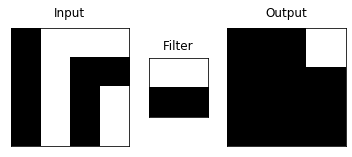

In [19]:
input = get_edged_input(4)

visualize_conv(input, v_edge_bw_22, threshold=True)
visualize_conv(input, h_edge_wb_22, threshold=True)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

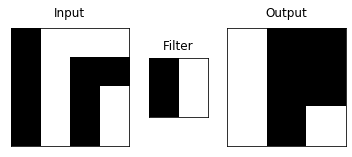

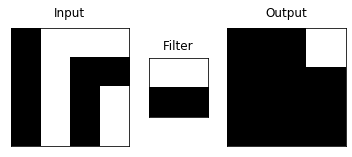

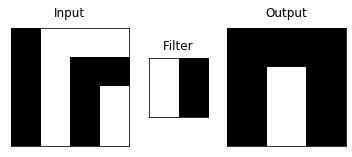

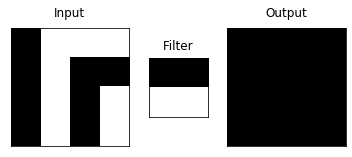

In [20]:
visualize_conv(input, v_edge_bw_22, threshold=True)
visualize_conv(input, h_edge_wb_22, threshold=True)
visualize_conv(input, v_edge_wb_22, threshold=True)
visualize_conv(input, h_edge_bw_22, threshold=True)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

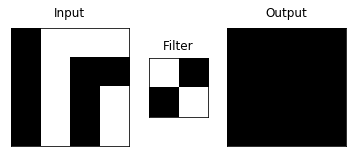

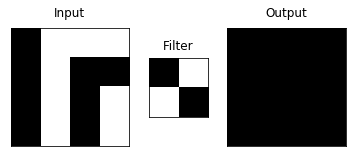

In [21]:
visualize_conv(input, diag1_22, threshold=True)
visualize_conv(input, diag2_22, threshold=True)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

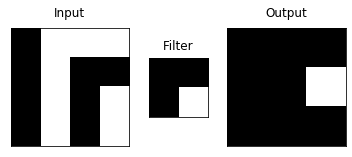

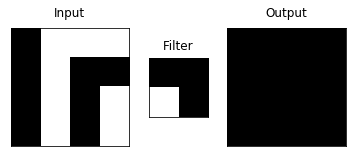

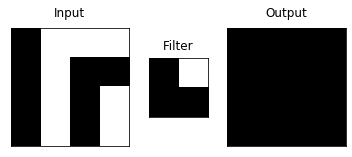

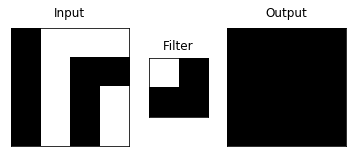

In [23]:
visualize_conv(input, corner_black_ul_22, threshold=True)
visualize_conv(input, corner_black_ur_22, threshold=True)
visualize_conv(input, corner_black_ll_22, threshold=True)
visualize_conv(input, corner_black_lr_22, threshold=True)